In [5]:
import sys

sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders
from training import train_PullSum
from useful_functions import *
from new_network_func import *

In [6]:
n = 20
batch_size = 128

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root, seed=42
)

In [7]:
I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
A,C=ring4()
B=get_B(A=A,u=2*n,n=n)

""" A, B = R, R """
show_row(A)
_, __ = test_row(A)
print(f"{_:.4e}, {__:.4e}")

A的第二大特征值: 0.9186474255414045
A的beta: 0.9689136943864273
A的spectral gap: 0.03108630561357273
A的kappa: 1.6000000000000079
S_A是: 422.9551215284598 

1.2876e+00, 3.1346e+02


optimizer初始化成功!


Training Progress: 100%|██████████| 100/100 [17:50<00:00, 10.71s/it, epoch=100, test_accuracy=77.2900000000%, test_loss=0.6514441308, train_loss=0.9261151589]


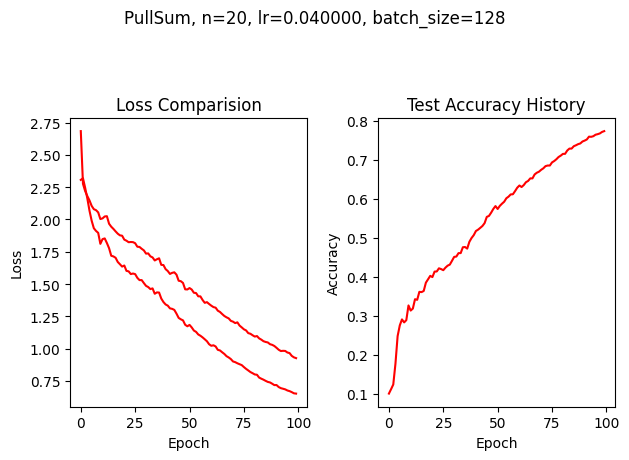

([2.6845487719774246,
  2.276599832177162,
  2.220365746021271,
  2.1815583896636968,
  2.147870497107505,
  2.105279925763607,
  2.079923992753029,
  2.07244599878788,
  2.055132278800011,
  2.0034513682127,
  2.0087706026434904,
  2.0234890589118004,
  2.0256376522779465,
  1.9671087595820425,
  1.9442052695155145,
  1.927087204456329,
  1.9078669890761375,
  1.8899985247850417,
  1.8772328236699107,
  1.8745354890823365,
  1.8440803307294846,
  1.8357164129614827,
  1.8240505442023278,
  1.8257185247540477,
  1.8246203511953354,
  1.816285176575184,
  1.7891868817806245,
  1.7873016437888147,
  1.773069631755352,
  1.7608492955565453,
  1.7357360708713532,
  1.7372978043556213,
  1.7147461867332456,
  1.7062476426362991,
  1.682687112390995,
  1.6921027767658239,
  1.6994481539726258,
  1.6488087704777719,
  1.6471909123659139,
  1.6154306373000147,
  1.6007209798693656,
  1.5783672264218334,
  1.586761648058891,
  1.5908658453822135,
  1.5727763068675995,
  1.5257708702981474,
  1.

In [8]:
lr = 2e-3
epochs = 100
warm_up = False

train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring4, n={n}, lr={lr}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)